# Exploratory Data Analysis

Understanding our data is a crucial step in any data science project. In this assignment, you will perform an exploratory data analysis of corpus of documents. The corpus consists of 11,587 documents, each of which is a news article. The documents are stored in a folder called `data` in the root of the repository and the data is stored in the shared google drive `datasets`.

In this assignment, you will analyze a corpus of news documents to answer the following questions:

0. What is the nature of our data?
    - 0a. What is the size of the corpus?
    - 0b. Are there any duplicates in the corpus? If so, drop them.
    - 0c. Are there any missing values in the corpus?
    - 0d. How many unique documents are there in the corpus?
1. What is the distribution of `token`s per document?
    - 1a. What is the longest article?
    - 1b. What is the shortest article?
    - 1c. What is the 95th percentile of article lengths?
2. How many different sources are there in the corpus?
    - 2a. How many different sources are there in the dataset?
    - 2b. What is the distribution of articles per source?

In [205]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()

## News Corpus

You are provided the following news corpus: `data/news_corpus.csv`. The corpus contains the following columns:

- `index` int: The unique identifier of the document.
- `source` str: The source of the document
- `title` str: The title of the document
- `text` str: The content of the article

The data used in this notebook comes from the [`StoryGraph`](https://archive.org/details/storygraph?tab=about) project, created and maintained by Prof. Alexander Nwala.

```BibTeX
@MISC {nwala-cj20,
    author = {Alexander Nwala and Michele C. Weigle and Michael L. Nelson},
     title = {365 Dots in 2019: Quantifying Attention of News Sources},
     year = {2020},
      month = may,
     howpublished = {Poster/demo accepted at the Computation + Journalism Symposium (symposium cancelled due to COVID-19)},
     arxiv = {https://arxiv.org/abs/2003.09989},
     pubdate = {202005}
}
```

## Load Data into Pandas dataframe

In [243]:
df = pd.read_csv('data/news-2023-02-01.csv')
df.head(10)

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
5,vox,What layoffs at Google and other tech companie...,The path forward for tech workers won’t be eas...
6,vox,Did Republican Representative-elect George San...,New York Representative-elect George Santos sp...
7,vox,Sundance 2023: 17 movies to watch out for this...,Chiwetel Ejiofor and Emilia Clarke in The Pod ...
8,huffpost,Watch Trump Give Deposition In New York Civil ...,Watch Trump Give Deposition In New York Civil ...
9,huffpost,Ron DeSantis Plans To Defund Diversity Program...,Politics Florida Ron DeSantis higher education...


## 0. What is the nature of our data?

Using your coding skills, answer the following questions. Please comment on your code and results.

In [244]:
## 0a. What is the size of the corpus?

### YOUR CODE HERE
df.shape
#there are 11587 documents in the corpus
len(df)

11587

In [247]:
## 0b. Are there any duplicates in the corpus? If so, remove or drop them.
## YOUR CODE HERE
data = df.drop_duplicates(subset = ['source', 'text']) #dropping duplicates based on source and text
len(data) #there were many duplicates, down to 1064 

1064

In [209]:
data

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ..."
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...


In [213]:
## 0c. Are there any missing values in the corpus? If so, what data are missing?
## Should the missing values be removed, explain?

## YOUR CODE HERE
na_values = data.isnull()
na_values.sum()

source    0
title     1
text      2
dtype: int64

In [214]:
#there is 1 NaN value in the title and 2 in the text
na_values.sort_values(by = ['title'], ascending = False) #index 9172 for title and text
na_values.sort_values(by = ['text'], ascending = False) #index 40 for text

,source,title,text
40,False,False,True
9172,False,True,True
0,False,False,False
8732,False,False,False
8771,False,False,False
...,...,...,...
6106,False,False,False
6110,False,False,False
6147,False,False,False
6164,False,False,False


In [211]:
data.loc[[40]]
#there is a debate on if this should be dropped, we could get information about its title but we don't have the text. If the analysis
#is on the text, then it should be dropped. If we're more worried about the title, then it should be kept. 

,source,title,text
40,realclearpolitics,Trump Struggled With Identity at His First Pub...,NaN


In [212]:
data.loc[[9172]]
#this value should definitely be dropped because it is just a source with no title or text, no information can be gained from it

,source,title,text
9172,foxnews,NaN,NaN


In [215]:
data.dropna(inplace = True)

<ipython-input-215-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [216]:
data #down to 1062 rows/documents

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ..."
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...


## 1.0 What is the distribution of `token`s per document?

Use the `spaCy` library to tokenize the text and analyze the distribution of token frequencies. You can use the `Counter` class from the `collections` library to count the number of times each token appears in the corpus.

In [217]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

## Load the spacy model: nlp
NLP = spacy.load('en_core_web_sm')


In [218]:
## Generate the tokens using Spacy

## YOUR CODE HERE
punctuation = list(string.punctuation)
whitespace = list(string.whitespace)[1:] #want to remove the new line characters and tabs, don't want to remove all space though so take after first index
undesired_characters = punctuation + whitespace
data['tokens'] = data['text'].progress_apply(lambda x: 
                                             [x.text.lower() for x in NLP(x) if x.text.lower() not in undesired_characters]) 

  0%|          | 0/1062 [00:00<?, ?it/s]

<ipython-input-218-536deaef8bc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['text'].progress_apply(lambda x:


In [219]:
data

,source,title,text,tokens
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,"[manhattan, prosecutors, are, likely, to, noti..."
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...,"[print, investigators, looking, into, donald, ..."
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...,"[the, ap, reported, republican, rep., george, ..."
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...,"[rachel, maddow, showed, how, trump, committed..."
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...,"[candles, are, placed, in, front, of, a, photo..."
...,...,...,...,...
11500,thehill,"White House bids farewell to Klain, as Zients ...","White House bids farewell to Klain, as Zients ...","[white, house, bids, farewell, to, klain, as, ..."
11543,thehill,Lawmakers clash over allowing guns in Natural ...,Lawmakers clash over allowing guns in Natural ...,"[lawmakers, clash, over, allowing, guns, in, n..."
11559,westernjournal,Pizza Shop Employee Gets Rude Awakening After ...,Pizza Shop Employee Gets Rude Awakening After ...,"[pizza, shop, employee, gets, rude, awakening,..."
11560,westernjournal,White House Accused of 'Dishonesty and Evasive...,President Joe Biden boards Air Force One at th...,"[president, joe, biden, boards, air, force, on..."


In [220]:
token_data = (data
              .explode('tokens')
             )
token_data

,source,title,text,tokens
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,manhattan
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,prosecutors
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,are
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,likely
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,to
...,...,...,...,...
11586,thegatewaypundit,Kremlin Offers Cash Bounties for Burning US an...,Russian politicians and companies offer reward...,rubles
11586,thegatewaypundit,Kremlin Offers Cash Bounties for Burning US an...,Russian politicians and companies offer reward...,"7,150"
11586,thegatewaypundit,Kremlin Offers Cash Bounties for Burning US an...,Russian politicians and companies offer reward...,for
11586,thegatewaypundit,Kremlin Offers Cash Bounties for Burning US an...,Russian politicians and companies offer reward...,their


In [221]:
## Count the tokens

## YOUR CODE HERE
token_frequency = (token_data
                  .groupby(by=['source', 'title', 'text', 'tokens'])
                  .agg({'tokens': 'count'})
                  .rename(columns={'tokens': 'token_frequency'})
                  .reset_index()
                 )
token_frequency
#token_frequency has the unique tokens and their counts in the document

,source,title,text,tokens,token_frequency
0,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,'ll,2
1,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,'re,3
2,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,'s,4
3,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,--,1
4,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,100,1
...,...,...,...,...,...
356516,westernjournal,Young Father Runs Across Busy Highway to Save ...,Young Father Runs Across Busy Highway to Save ...,“,5
356517,westernjournal,Young Father Runs Across Busy Highway to Save ...,Young Father Runs Across Busy Highway to Save ...,”,4
356518,westernjournal,Young Father Runs Across Busy Highway to Save ...,Young Father Runs Across Busy Highway to Save ...,🇩,1
356519,westernjournal,Young Father Runs Across Busy Highway to Save ...,Young Father Runs Across Busy Highway to Save ...,🇴,1


In [226]:
## YOUR CODE HERE
## Plot the distribution of the number of tokens per document
#want the total number of tokens in the document, so go back to the token_data df since it has rows for each token, not just unique tokens
document_frequency = (token_data
                  .groupby(by=['source', 'title', 'text'])
                  .agg({'tokens': 'count'})
                  .rename(columns={'tokens': 'token_count'})
                  .reset_index()
                 )
document_frequency

,source,title,text,token_count
0,abcnews.go,2 travelers say their wheelchairs were lost on...,2 travelers say their wheelchairs were lost on...,689
1,abcnews.go,2 travelers say their wheelchairs were lost on...,We'll notify you here with news about\nTurn on...,707
2,abcnews.go,Amazon slapped with more worker safety citatio...,Amazon slapped with more worker safety citatio...,641
3,abcnews.go,Biden to meet McCarthy amid debt limit fight: ...,Biden to meet McCarthy amid debt limit fight: ...,1346
4,abcnews.go,Biden to meet McCarthy amid debt limit fight: ...,Biden to meet McCarthy amid debt limit fight: ...,1346
...,...,...,...,...
1057,westernjournal,"Woman, 25, Uses Her Gun to Turn the Tables on ...",“The report indicates the suspects attacked th...,621
1058,westernjournal,"Woman, 25, Uses Her Gun to Turn the Tables on ...",“The report indicates the suspects attacked th...,621
1059,westernjournal,"Woman, 25, Uses Her Gun to Turn the Tables on ...",“The report indicates the suspects attacked th...,621
1060,westernjournal,"Woman, 25, Uses Her Gun to Turn the Tables on ...",“The report indicates the suspects attacked th...,621


array([[<AxesSubplot:title={'center':'token_count'}>]], dtype=object)

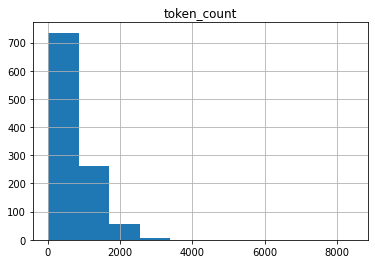

In [227]:
document_frequency.hist(column = 'token_count') #there's a right skew

In [228]:
## 1a. What is the longest article?
#Chose to look at length based on the number of tokens in the document
## YOUR CODE HERE
idx = document_frequency['token_count'].idxmax()
document_frequency.iloc[[idx]]

,source,title,text,token_count
377,nytimes,Women Have Been Misled About Menopause - The N...,Credit...Marta Blue for The New York Times\nSe...,8439


In [229]:
## 1b. What is the shortest article?

## YOUR CODE HERE
idx = document_frequency['token_count'].idxmin()
document_frequency.iloc[[idx]]

,source,title,text,token_count
449,realclearpolitics,The GOP Is Just Obnoxious | RealClearPolitics,"The GOP Is Just Obnoxious\nDavid Frum , The At...",12


In [231]:
document_frequency.iloc[[idx]]['text'].tolist() #it is actually that short

['The GOP Is Just Obnoxious\nDavid Frum , The Atlantic February 1, 2023\n']

In [232]:
## 1c. What is the 95th percentile of the number of tokens per document?
## Hint: use np.percentile

## YOUR CODE HERE
np.percentile(document_frequency['token_count'], 95)

1760.9499999999998

In [233]:
## 1d. What is the size of the vocabulary and the frequencies of each token in the corpus?

import string
from collections import Counter

## Create list of stopwords from spacy
stop_words = list(spacy.lang.en.stop_words.STOP_WORDS) + list(string.punctuation)

## YOUR CODE HERE
## hint: use Counter
tokens_list = token_data['tokens'].tolist() #using token_data again since it is not just the unique tokens and so we can get the counts
tokens = [x for x in tokens_list if x not in stop_words]
c = Counter(tokens)
len(c) #there are 21445 unique tokens that are not stop words, there are still some annoying punctuation not picked up in the stop_words

21445

In [234]:
c.most_common(50) #here are the 50 most common tokens, could show all of them but don't want to make the output too long

[('“', 8264),
 ('”', 8125),
 ('said', 4534),
 ('biden', 2817),
 ('—', 2510),
 ('house', 1997),
 ('president', 1938),
 ('new', 1921),
 ('story', 1632),
 ('advertisement', 1624),
 ('continues', 1411),
 ('\xa0', 1369),
 ('trump', 1350),
 ('year', 1184),
 ('2023', 1162),
 ('people', 1134),
 ('’', 1130),
 ('according', 1123),
 ('news', 1123),
 ('time', 1113),
 ('state', 1102),
 ('like', 1049),
 ('ukraine', 958),
 ('white', 920),
 ('committee', 904),
 ('police', 886),
 ('republicans', 879),
 ('tuesday', 878),
 ('mccarthy', 837),
 ('public', 820),
 ('republican', 811),
 ('years', 800),
 ('wednesday', 791),
 ('1', 747),
 ('government', 722),
 ('mr.', 716),
 ('american', 715),
 ('russia', 713),
 ('january', 703),
 ('told', 687),
 ('debt', 673),
 ('states', 659),
 ('security', 646),
 ('percent', 637),
 ('ukrainian', 637),
 ('office', 622),
 ('r', 622),
 ('school', 618),
 ('u.s.', 611),
 ('country', 604)]

## 2.0 How many different sources are there in the corpus?

Please describe how many different sources exist in the dataset.

In [235]:
## 2a. Plot how many different sources are there in the corpus?

## YOUR CODE HERE
source_frequency = (data
                  .groupby(by=['source'])
                  .agg({'source': 'count'})
                  .rename(columns={'source': 'source_count'})
                  .reset_index()
                 )
source_frequency

,source,source_count
0,abcnews.go,43
1,breitbart,43
2,checkyourfact.com,2
3,cnn,78
4,dailycaller,53
5,foxnews,3
6,huffpost,54
7,msnbc,30
8,nytimes,72
9,politico,44


In [236]:
len(source_frequency) #there are 20 sources

20

Text(0.5, 1.0, '# Of Articles From Each Source')

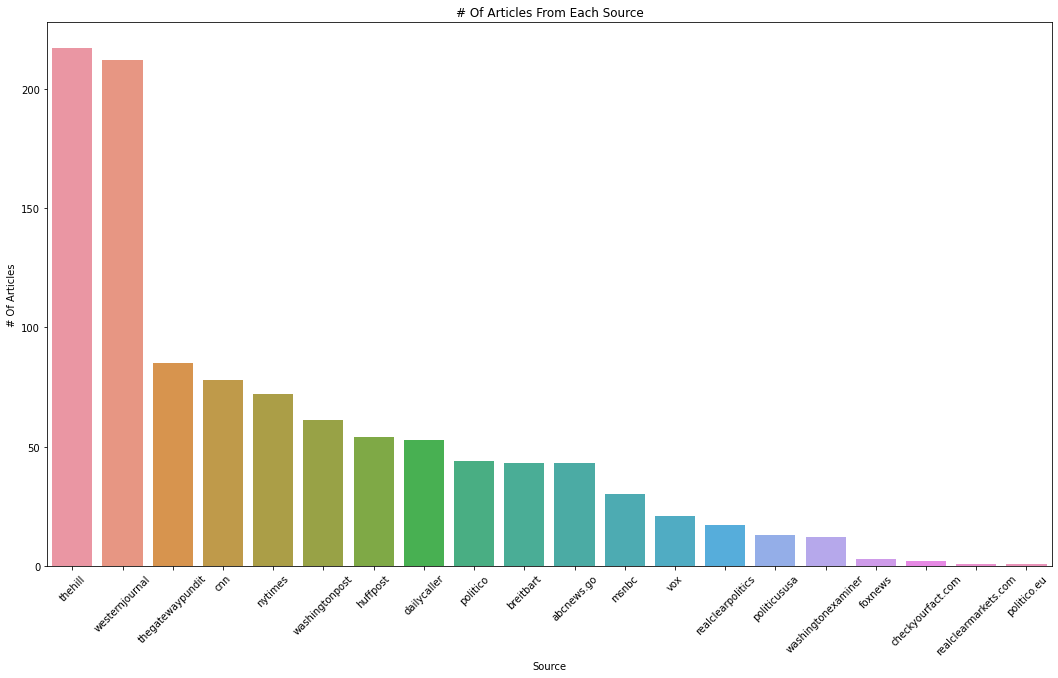

In [237]:
source_frequency.sort_values(by = 'source_count', ascending = False, inplace = True)

plt.figure(figsize = (18,10))
plt.xticks(rotation=45)

g = sns.barplot(data = source_frequency, x = 'source', y = 'source_count')
g.set_xlabel('Source')
g.set_ylabel('# Of Articles')
g.set_title('# Of Articles From Each Source')
#there is clearly not an even distribution of articles among the 20 different sources, with politco, realclearmarkets, checkyourfacts
#and fox having the smallest amount. The hill and western journal have the highest by far. 

Text(0.5, 1.0, 'Distribtuion of Articles Per Source')

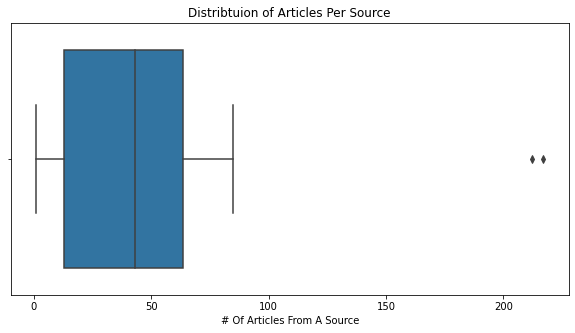

In [242]:
## 2b. Plot the distribution of articles per source?
## hint: use seaborn boxplot

## YOUR CODE HERE
plt.figure(figsize = (10,5))
b = sns.boxplot(data = source_frequency, x = 'source_count')
b.set_xlabel('# Of Articles From A Source')
b.set_title('Distribtuion of Articles Per Source')
#there are 2 clear outliers 